In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

from resistor_capacitor.src.array import Array
from resistor_capacitor.src.matrix import Matrix
from resistor_capacitor.src.equation import Equation
from resistor_capacitor.src.failure import Failure
from resistor_capacitor.breakdown import breakdown as breakdown_rc

In [2]:
length = 40
width = 2.0
seed = 79
val_cap = 1.0

In [3]:
array = Array(length=length, mode_analysis=True)
matrix = Matrix(matrix_init=None, array=array, val_cap=val_cap)
equation = Equation(array=array, matrix=matrix)
failure = Failure(array=array, matrix=matrix, equation=equation, width=width, seed=seed, save_volts_profile=True)

In [4]:
solve = equation.solve_init
break_edge = failure.break_edge_init
solve()
break_edge()

check_graph = equation.check_graph
solve = equation.solve
break_edge = failure.break_edge
for _ in range(array.length - 1):
    check_graph()
    solve()
    break_edge()

while check_graph():
    solve()
    break_edge()

---
---
---

In [5]:
from analysis.src.datum import Datum
datum = Datum(failure)
datum.check_profile(), datum.check_connectivity(), datum.check_num_cycle()

(7.327471962526033e-15, 2, 1)

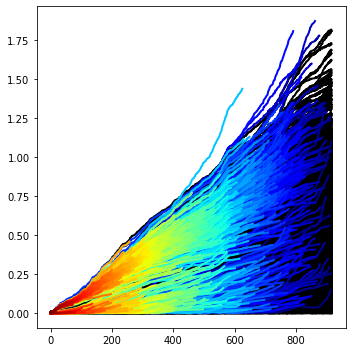

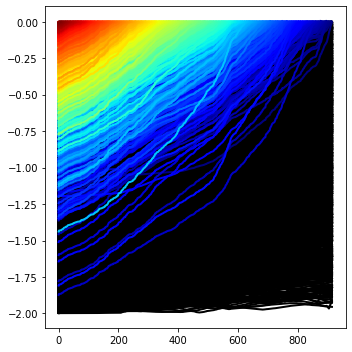

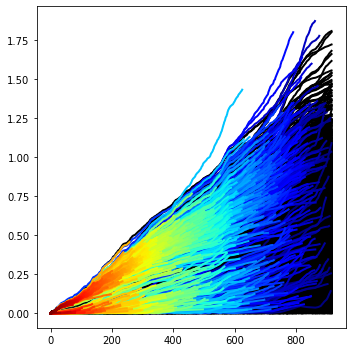

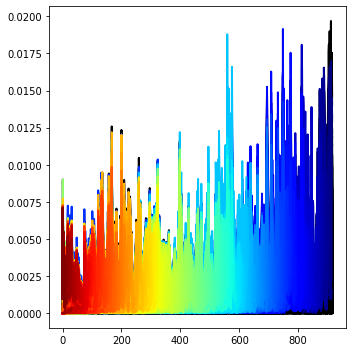

In [6]:
signed, size_fig, size_obj, rainbow = False, 5, 2, True
datum.draw_profile("edge", signed, size_fig, size_obj, rainbow)
datum.draw_profile("stress", signed, size_fig, size_obj, rainbow)
datum.draw_profile("cap", signed, size_fig, size_obj, rainbow)
datum.draw_profile("cond", signed, size_fig, size_obj, rainbow)

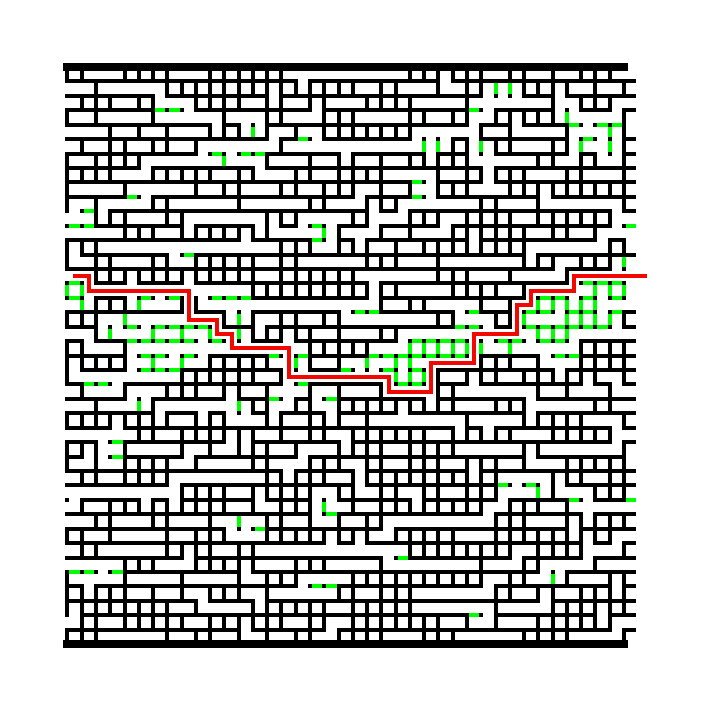

In [7]:
size_fig, size_obj, draw_dual, draw_unalive = 10.0, 4.0, True, True
save, pad_inches, transparent = False, 0.7, False
datum.initialize_graph(size_fig, size_obj, draw_dual, draw_unalive, save, pad_inches, transparent)

idxs_edge_broken, num_edge_broken_rainbow, with_labels = None, 0, False
datum.draw_graph(idxs_edge_broken, num_edge_broken_rainbow, with_labels)

---
---
---